In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import altair as alt
from pyprojroot import here
from src.data.read_dataset import get_processed_dataset
from src.visualization import visualize

prov_df = get_processed_dataset('dpc_province')

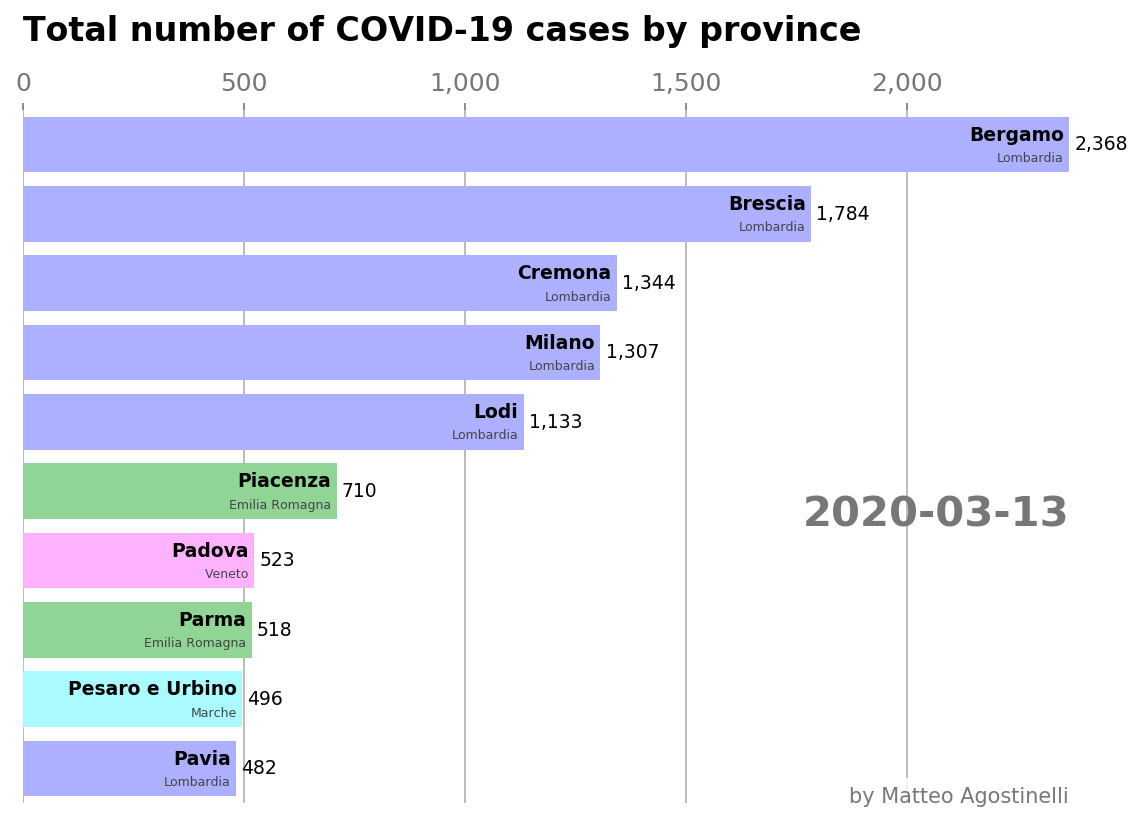

In [5]:
colors = dict(zip(
    ['Lombardia', 'Veneto', 'Emilia Romagna', 'Friuli Venezia Giulia',
     'Marche', 'Piemonte', 'Toscana', 'Liguria'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50', '#e4e6e1']
))
group_lk = prov_df.set_index('provincia')['regione'].to_dict()

fig, ax = plt.subplots(figsize=(9, 6))
def draw_barchart(date):
    df = prov_df[(prov_df.data == date) & (~prov_df.provincia.str.contains("fase"))].sort_values(by='totale_casi', ascending=True).tail(10)
    ax.clear()
    ax.barh(df['provincia'], df['totale_casi'], color=[colors.get(group_lk[x], '#e4e6e1') for x in df['provincia']])
    dx = df['totale_casi'].max() / 200
    # iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
    for i, (value, name) in enumerate(zip(df['totale_casi'], df['provincia'])):
        ax.text(value-dx, i,     name,           size=9, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=6, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=9, ha='left',  va='center')
    ax.text(1, 0.4, str(date)[:10], transform=ax.transAxes, color='#777777', size=20, ha='right', weight=800)
    #ax.text(0, 1.06, 'Total number of confirmed cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.1, 'Total number of COVID-19 cases by province',
            transform=ax.transAxes, size=16, weight=600, ha='left')
    ax.text(1, 0, 'by Matteo Agostinelli', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(max(prov_df.data))

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


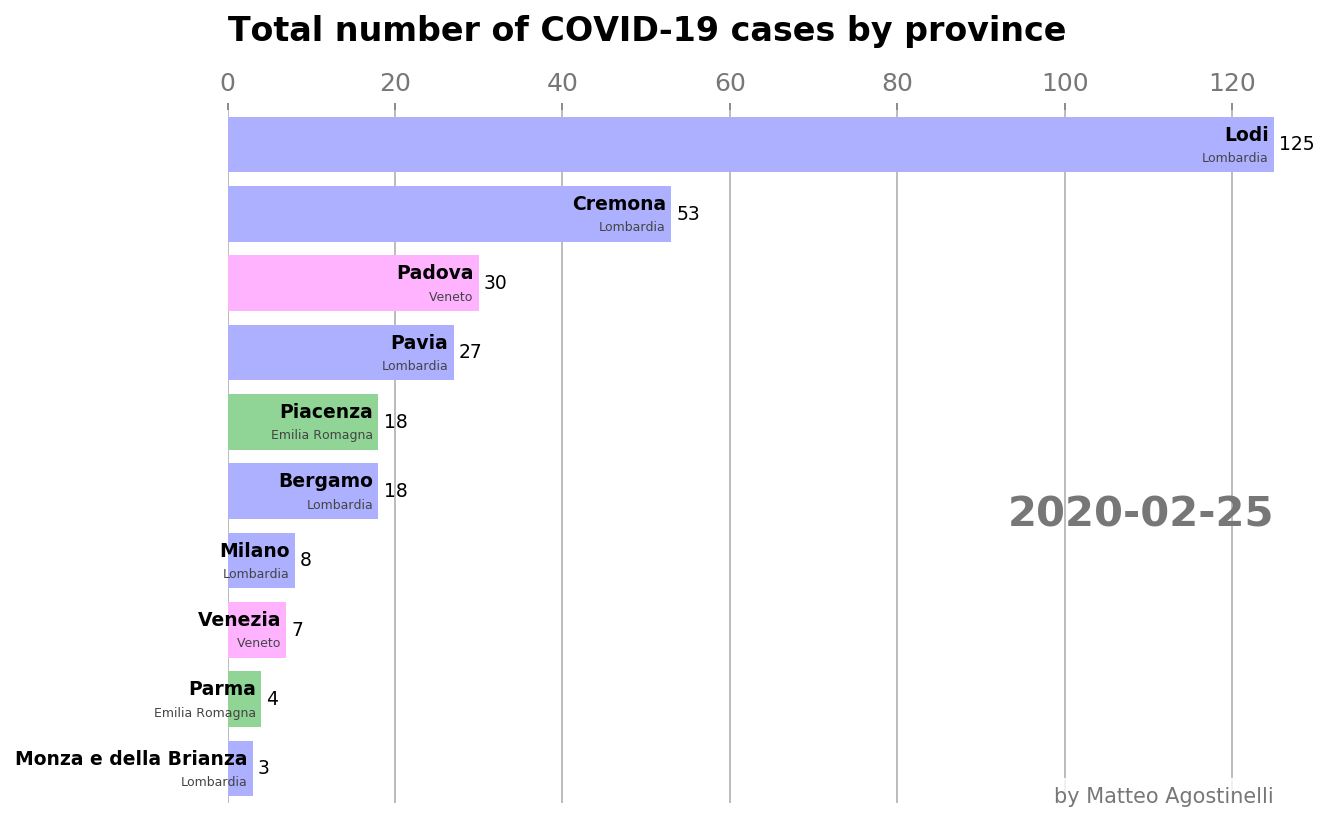

In [6]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(9, 6))
animator = animation.FuncAnimation(fig, draw_barchart, frames=prov_df.data.unique()[1:], interval=1500, save_count = 100)
#HTML(animator.to_jshtml())
animator.save(here('./reports/province_casi.gif'))